# HOUSING PROJECT: PRICE PREDICTION

**Data Description**

*Problem Statement:*

*Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
Which variables are important to predict the price of variable?
How do these variables describe the price of the house? ### Business Goal: #### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.*


**Importing the Dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df=pd.read_csv(r"D:\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
ds=pd.read_csv(r"D:\test.csv")
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [7]:
df.columns    # checking the variables in column section.

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

# Dataframe Description:

in the above dataset the target is to predict the Sale price of the house:

In [8]:
df.info()  #Checking the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [9]:
ds.info()  #Checking the information about test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [10]:
df.shape #checking the data dimension

(1168, 81)

We have 1168 rows and 81 columns including the target column.

In [11]:
ds.shape #checking the data dimension

(292, 80)

We have 292 rows and 80 columns excluding the target column.

In [12]:
df['SalePrice'].value_counts() # checking the value counts of Target variable

140000    18
135000    16
155000    12
139000    11
160000    11
145000    10
190000     9
130000     9
110000     9
125000     8
215000     8
129000     8
127000     8
115000     8
147000     8
185000     8
200000     7
128000     7
141000     7
175000     7
180000     7
176000     7
144000     7
230000     7
235000     7
100000     7
165000     7
173000     6
108000     6
170000     6
174000     6
205000     6
132500     6
148000     6
225000     5
158000     5
187500     5
137000     5
260000     5
239000     5
157000     5
250000     5
181000     5
240000     5
120000     5
124000     5
136500     5
152000     5
290000     5
143000     5
151000     5
178000     5
133000     5
172500     5
119000     4
184000     4
168000     4
191000     4
214000     4
163000     4
325000     4
137500     4
150000     4
127500     4
192000     4
171000     4
275000     4
207500     4
112000     4
118500     4
120500     4
132000     4
113000     4
123000     4
149900     4
189000     4
124500     4

# Making Dataframe of the Nominal data

In [13]:
df_visualization_nominal=df[['Street', 'Alley','LotShape','Utilities','LandContour','LotConfig','LandSlope',
                             'RoofStyle','RoofMatl','MasVnrType','Heating','Electrical','CentralAir',
                             'Functional','GarageFinish','PavedDrive','MiscFeature',]].copy()

In [14]:
df_visualization_nominal.columns

Index(['Street', 'Alley', 'LotShape', 'Utilities', 'LandContour', 'LotConfig', 'LandSlope', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Heating', 'Electrical', 'CentralAir', 'Functional', 'GarageFinish', 'PavedDrive', 'MiscFeature'], dtype='object')

# Visualization of the Data:

*For the nominal categorical data we will use countplot as it will give the frequency of the classes of columns:*

Pave    1164
Grvl       4
Name: Street, dtype: int64


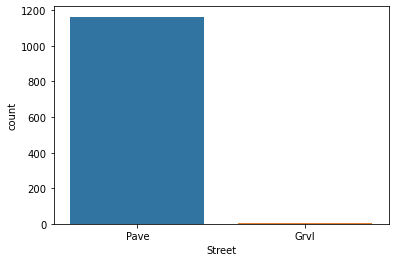

In [15]:
Js = sns.countplot(x="Street",data=df_visualization_nominal)
print(df_visualization_nominal["Street"].value_counts())

*From the above observation the total number of road access to the property for paved and gravel is 1164 and 4 respectively.*

Grvl    41
Pave    36
Name: Alley, dtype: int64


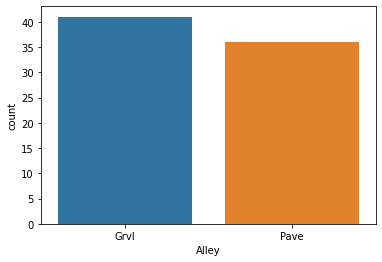

In [16]:
Js = sns.countplot(x="Alley",data=df_visualization_nominal)
print(df_visualization_nominal["Alley"].value_counts())

*From the above observation the total number of alley access to the property for paved and gravel is 36 and 41 respectively.*

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


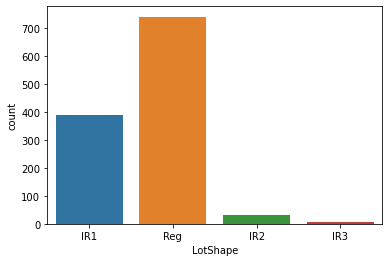

In [17]:
Js = sns.countplot(x="LotShape",data=df_visualization_nominal)
print(df_visualization_nominal["LotShape"].value_counts())

*From the above observation the total number of shape of property for regular, slightly regular, moderately regualar, irregualar is 740,390,32 and 6 respectively.*

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


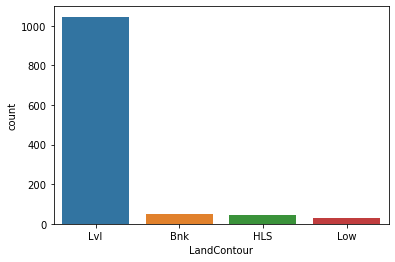

In [18]:
Js = sns.countplot(x="LandContour",data=df_visualization_nominal)
print(df_visualization_nominal["LandContour"].value_counts())

*From the above observation the total number of flatness of the property for level, banked, hillside and depression is 1046,50,42 and 30 respectively.*

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


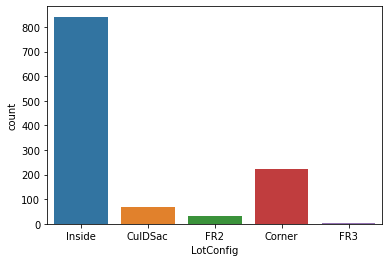

In [19]:
Js = sns.countplot(x="LotConfig",data=df_visualization_nominal)
print(df_visualization_nominal["LotConfig"].value_counts())

*From the above observation the total number of lot configuration of the property for inside, corner, CulDScac, frontage 2 and frontage 3 is 842, 222, 69, 33 and 2 respectively.*

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


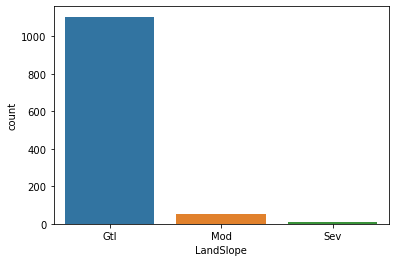

In [20]:
Js = sns.countplot(x="LandSlope",data=df_visualization_nominal)
print(df_visualization_nominal["LandSlope"].value_counts())

*From the above observation the total number of land slope of the property for gentle, moderate and severe slope is 1105, 51 and 12 respectively.*

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


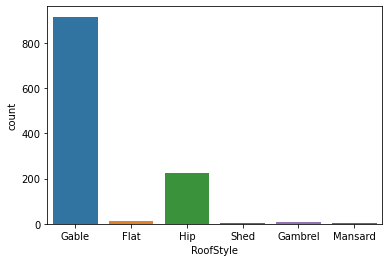

In [21]:
Js = sns.countplot(x="RoofStyle",data=df_visualization_nominal)
print(df_visualization_nominal["RoofStyle"].value_counts())

*From the above observation the total number of roof style of the property for flat, gable, gambrel, hip, mansard and shed is 12, 9, 225, 5 and 2 respectively.*

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


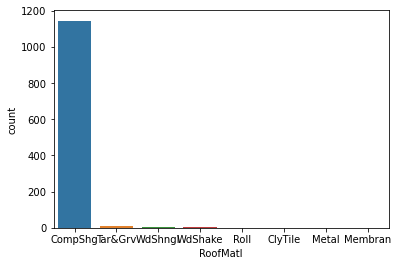

In [22]:
Js = sns.countplot(x="RoofMatl",data=df_visualization_nominal)
print(df_visualization_nominal["RoofMatl"].value_counts())

*From the above observation the total number of roof material of the property for tile, composite, membrane, roll, garvel, wood shakes and wood shingles is 1, 1144, 1, 1, 1, 10, 4 and 6 respectively.*

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


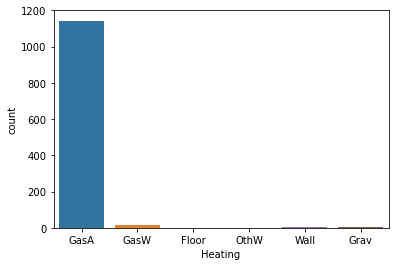

In [23]:
Js = sns.countplot(x="Heating",data=df_visualization_nominal)
print(df_visualization_nominal["Heating"].value_counts())

*From the above observation the total number of heating of the property for floor furnance, gas forced warm air furnance gas hot water, gravity furnance , hot water and wall furnance is 1, 1143, 14, 5, 1 and 4 respectively.*

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


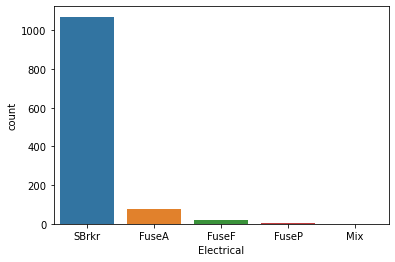

In [24]:
Js = sns.countplot(x="Electrical",data=df_visualization_nominal)
print(df_visualization_nominal["Electrical"].value_counts())

*From the above observation the total number of electrical sysytem of the property for standard circuit breaker & romex, average fuse box, fair fuse box, poor fuse box and mixed is 1070, 74, 21, 2 and 1 respectively.*

Y    1090
N      78
Name: CentralAir, dtype: int64


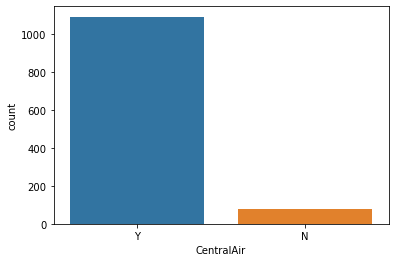

In [25]:
Js = sns.countplot(x="CentralAir",data=df_visualization_nominal)
print(df_visualization_nominal["CentralAir"].value_counts())

*From the above observation the total number of cnetral air conditioning of the property has 1090 of 1168.*

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


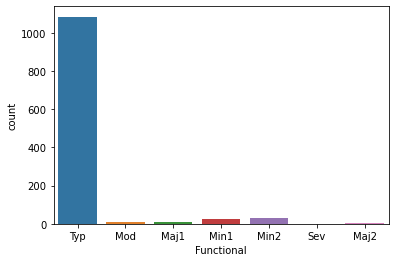

In [26]:
Js = sns.countplot(x="Functional",data=df_visualization_nominal)
print(df_visualization_nominal["Functional"].value_counts())

*From the above observation the total number of home functionality of the property for typical functionality, minor deduction 1, minor deduction 2, moderate deduction, major deduction 1, major deduction 2, severally damaged and salvage only is 1085, 30, 25, 12, 11, 4 and 1 respectively.*

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


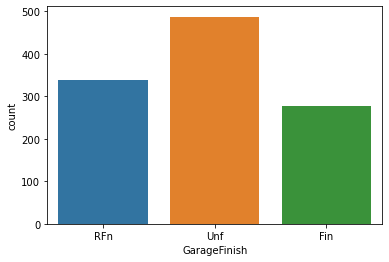

In [27]:
Js = sns.countplot(x="GarageFinish",data=df_visualization_nominal)
print(df_visualization_nominal["GarageFinish"].value_counts())

*From the above observation the total number of garage finish of the property for finished, rough finished, unfinished is 278, 339, and 487 respectively.*

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


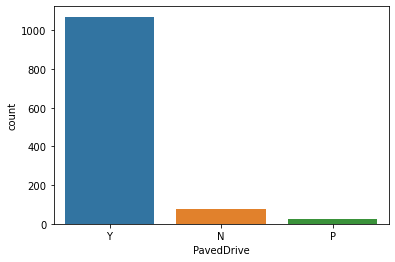

In [28]:
Js = sns.countplot(x="PavedDrive",data=df_visualization_nominal)
print(df_visualization_nominal["PavedDrive"].value_counts())

*From the above observation the total number of paved driveway of the property for paved, partial pavement and gravel is 1071, 23 and 74 respectively.*

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64


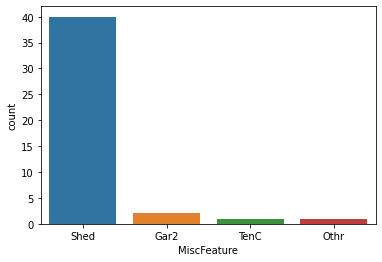

In [29]:
Js = sns.countplot(x="MiscFeature",data=df_visualization_nominal)
print(df_visualization_nominal["MiscFeature"].value_counts())

*From the above observation the total number of miscellaneous features not covered in other categories of the property for 2nd garage, other, shed and tennis court is 2, 1, 40 and 1 respectively.*


*For the ordinal categorical data we will use lineplot as it will give the flow of the line of the classes of the columns:*

# Making Dataframe of the Ordinal data

In [30]:
df_visualization_ordinal=df[['MSZoning','BldgType','OverallQual','OverallCond','BsmtQual', 'BsmtCond',
                             'BsmtExposure','HeatingQC','FireplaceQu','KitchenQual','GarageQual','GarageCond',
                             'PoolQC','SaleType','SaleCondition',]].copy()

In [31]:
df_visualization_ordinal.columns

Index(['MSZoning', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'FireplaceQu', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC', 'SaleType', 'SaleCondition'], dtype='object')

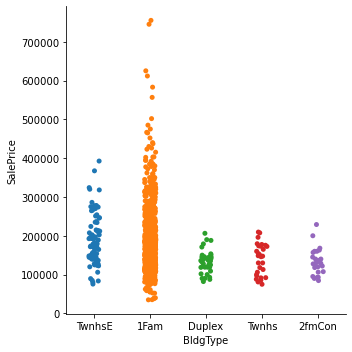

In [32]:
sns.catplot(x="BldgType",y="SalePrice", data=df)

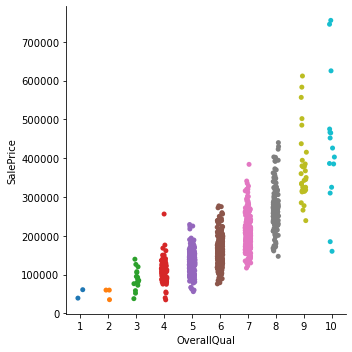

In [33]:
sns.catplot(x="OverallQual",y="SalePrice", data=df)

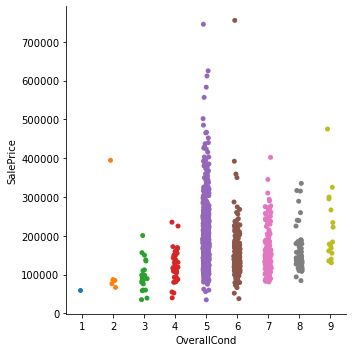

In [34]:
sns.catplot(x="OverallCond",y="SalePrice", data=df)

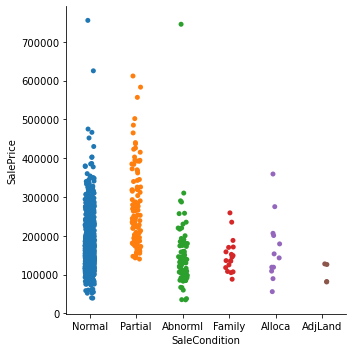

In [35]:
sns.catplot(x="SaleCondition",y="SalePrice", data=df)

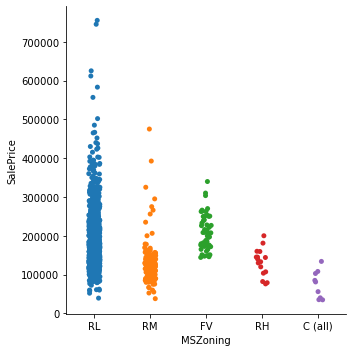

In [36]:
sns.catplot(x="MSZoning",y="SalePrice", data=df)

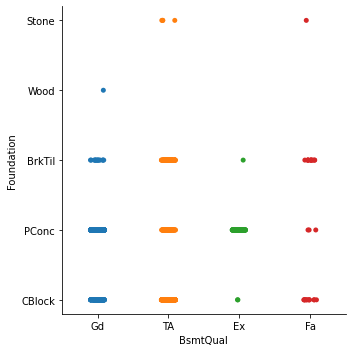

In [37]:
sns.catplot(x="BsmtQual",y="Foundation", data=df)

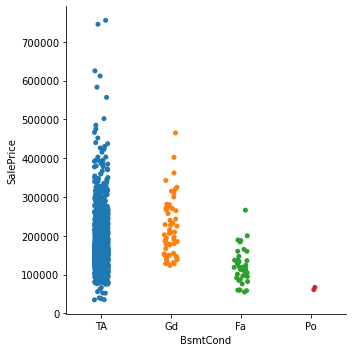

In [38]:
sns.catplot(x="BsmtCond",y="SalePrice", data=df)

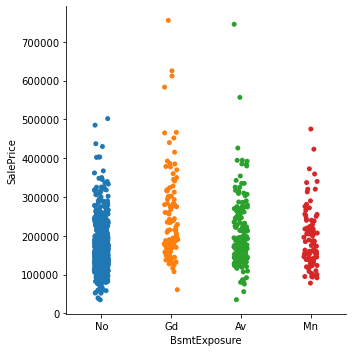

In [39]:
sns.catplot(x="BsmtExposure",y="SalePrice", data=df)

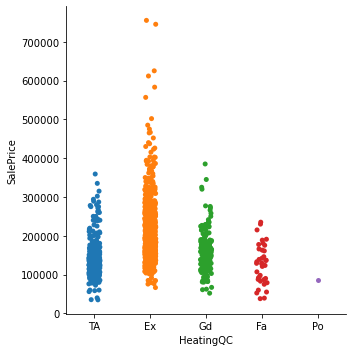

In [40]:
sns.catplot(x="HeatingQC",y="SalePrice", data=df)

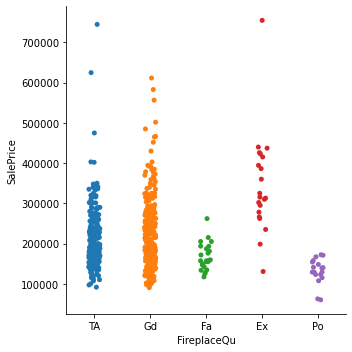

In [41]:
sns.catplot(x="FireplaceQu",y="SalePrice", data=df)

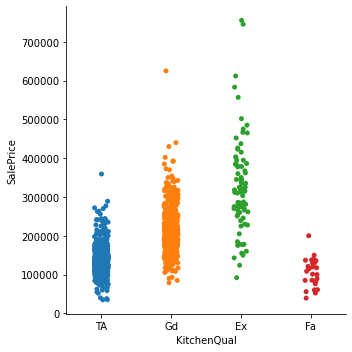

In [42]:
sns.catplot(x="KitchenQual",y="SalePrice", data=df)

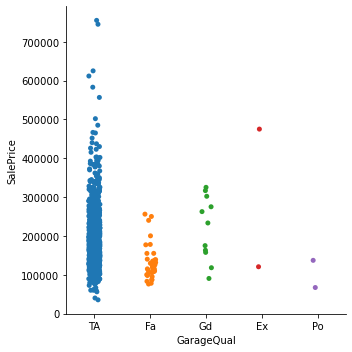

In [43]:
sns.catplot(x="GarageQual",y="SalePrice", data=df)

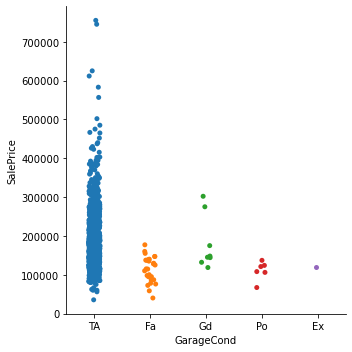

In [44]:
sns.catplot(x="GarageCond",y="SalePrice", data=df)

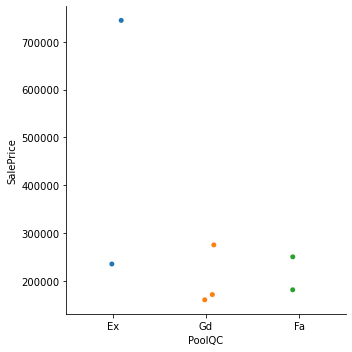

In [45]:
sns.catplot(x="PoolQC",y="SalePrice", data=df)

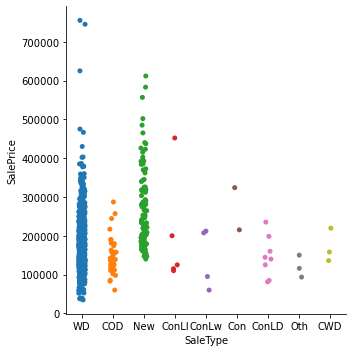

In [46]:
sns.catplot(x="SaleType",y="SalePrice", data=df)

# Checking the distribution of the continuous value of float type columns:

In [47]:
df_visualization_continuous=df[['LotFrontage', 'LotArea','YearBuilt','GrLivArea', 'GarageYrBlt','MoSold', 'YrSold',
                                'SalePrice']].copy()

In [48]:
df_visualization_continuous.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

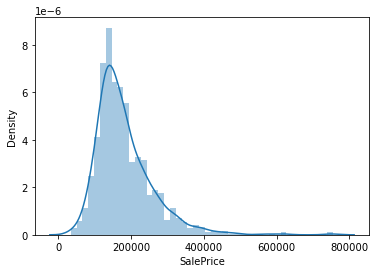

In [49]:
sns.distplot(df_visualization_continuous["SalePrice"], kde=True)

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

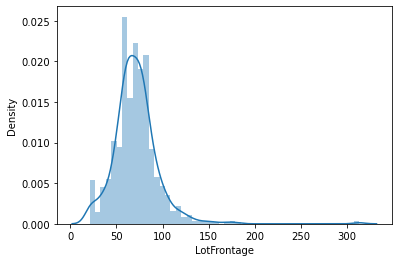

In [50]:
sns.distplot(df_visualization_continuous["LotFrontage"], kde=True)

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

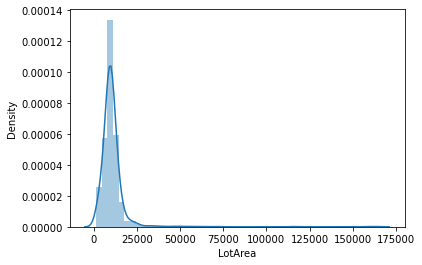

In [51]:
sns.distplot(df_visualization_continuous["LotArea"], kde=True)

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

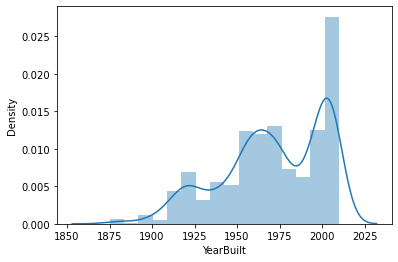

In [52]:
sns.distplot(df_visualization_continuous["YearBuilt"], kde=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

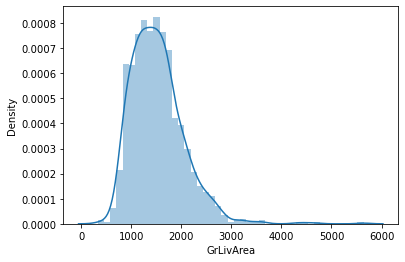

In [53]:
sns.distplot(df_visualization_continuous["GrLivArea"], kde=True)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

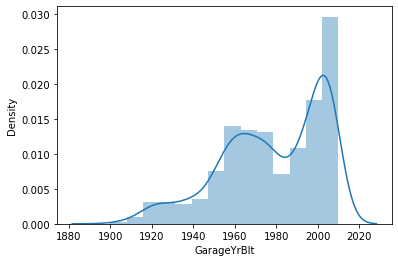

In [54]:
sns.distplot(df_visualization_continuous["GarageYrBlt"], kde=True)

<AxesSubplot:xlabel='MoSold', ylabel='Density'>

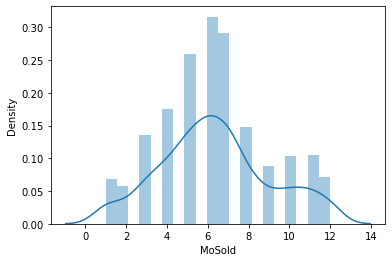

In [55]:
sns.distplot(df_visualization_continuous["MoSold"], kde=True)

<AxesSubplot:xlabel='YrSold', ylabel='Density'>

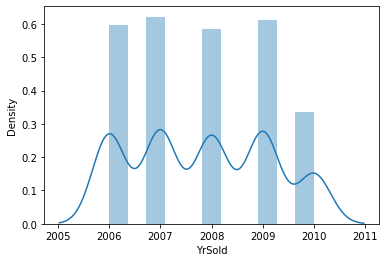

In [56]:
sns.distplot(df_visualization_continuous["YrSold"], kde=True)

**Violinplot Display distribution of Target variable.**

<AxesSubplot:xlabel='SalePrice'>

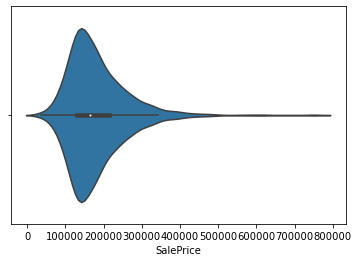

In [57]:
sns.violinplot(x='SalePrice',data=df, split=True)

**Boxplot Display distribution of Target variable.**

<AxesSubplot:xlabel='SalePrice'>

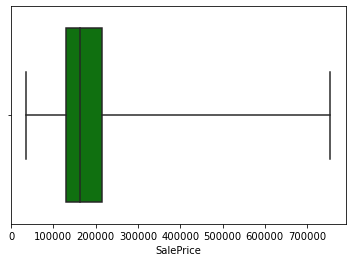

In [59]:
sns.boxplot(df['SalePrice'], whis=10, color="g")

**Visualization part is completed.**

*The columns that are going to be drop are Utilities.They are strings,cannot be categorized and dont contribute much to the outcome.*

In [60]:
df.drop(['Utilities'],axis=1,inplace=True)

# Preprocessing

In [61]:
df.describe() #statistics summary for numerical columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
#Check the null values in dataset
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [63]:
#filling the missing values for numerical terms by mean
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [64]:
#filling the missing values for categorical terms by mode
df['Alley']=df['Alley'].fillna(df['Alley'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['PoolQC']=df['PoolQC'].fillna(df['PoolQC'].mode()[0])
df['Fence']=df['Fence'].fillna(df['Fence'].mode()[0])
df['MiscFeature']=df['MiscFeature'].fillna(df['MiscFeature'].mode()[0])

In [65]:
#Filled the null values in dataset
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

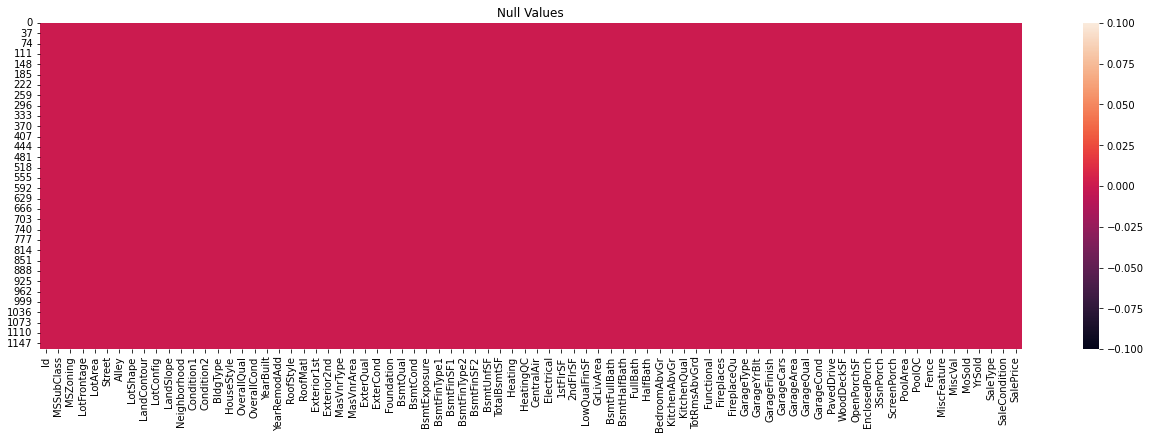

In [66]:
# Heatmap for Null value for data.
plt.figure(figsize=[22,6])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

*There are no null value in the dataset.*

*Since the dataset has a lot string values.We will use the encoding techniques to convert the string data to numerical one.*

# Encoding of DataFrame:

In [67]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [68]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [69]:
df.head()    # informtion about top of the data after Ordinal encoder

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,70.98847,4928,1.0,0.0,0.0,3.0,4.0,0.0,13.0,2.0,2.0,4.0,2.0,6,5,1976,1976,1.0,1.0,8.0,9.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,120,5.0,0,958,1078,1.0,4.0,1.0,4.0,958,0,0,958,0,0,2,0,2,1,3.0,5,6.0,1,4.0,1.0,1977.0,1.0,2,440,4.0,4.0,2.0,0,205,0,0,0,0,2.0,2.0,2.0,0,2,2007,8.0,4.0,128000
1,889,20,3.0,95.00000,15865,1.0,0.0,0.0,3.0,4.0,1.0,12.0,2.0,2.0,0.0,2.0,8,6,1970,1970,0.0,5.0,12.0,13.0,2.0,0.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0,351,4.0,823,1043,2217,1.0,0.0,1.0,4.0,2217,0,0,2217,1,0,2,0,4,1,2.0,8,6.0,1,4.0,1.0,1970.0,2.0,2,621,4.0,4.0,2.0,81,207,0,0,224,0,2.0,2.0,2.0,0,10,2007,8.0,4.0,268000
2,793,60,3.0,92.00000,9920,1.0,0.0,0.0,3.0,1.0,0.0,15.0,2.0,2.0,0.0,5.0,7,5,1996,1997,1.0,1.0,7.0,7.0,2.0,0.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,862,5.0,0,255,1117,1.0,0.0,1.0,4.0,1127,886,0,2013,1,0,2,1,3,1,3.0,8,6.0,1,4.0,1.0,1997.0,2.0,2,455,4.0,4.0,2.0,180,130,0,0,0,0,2.0,2.0,2.0,0,6,2007,8.0,4.0,269790
3,110,20,3.0,105.00000,11751,1.0,0.0,0.0,3.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6,6,1977,1977,3.0,1.0,8.0,9.0,1.0,480.0,3.0,4.0,1.0,2.0,3.0,3.0,1.0,705,5.0,0,1139,1844,1.0,0.0,1.0,4.0,1844,0,0,1844,0,0,2,0,3,1,3.0,7,6.0,1,4.0,1.0,1977.0,1.0,2,546,4.0,4.0,2.0,0,122,0,0,0,0,2.0,2.0,2.0,0,1,2010,0.0,4.0,190000
4,422,20,3.0,70.98847,16635,1.0,0.0,0.0,3.0,2.0,0.0,14.0,2.0,2.0,0.0,2.0,6,7,1977,2000,1.0,1.0,4.0,4.0,3.0,126.0,2.0,4.0,1.0,2.0,3.0,3.0,0.0,1246,5.0,0,356,1602,1.0,2.0,1.0,4.0,1602,0,0,1602,0,1,2,0,3,1,2.0,8,6.0,1,4.0,1.0,1977.0,0.0,2,529,4.0,4.0,2.0,240,0,0,0,0,0,2.0,2.0,2.0,0,6,2009,8.0,4.0,215000


# Describe the dataset:

In [70]:
# Stastistical summary
df_describe=df.describe()
df_describe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,3.013699,70.988470,10484.749144,0.996575,0.030822,1.938356,2.773973,3.004281,0.064212,12.145548,2.032534,2.005993,0.476027,3.043664,6.104452,5.595890,1970.930651,1984.758562,1.402397,1.086473,8.659247,9.363014,1.758562,102.310078,2.530822,3.725171,1.395548,2.282534,2.802226,2.273116,2.798801,444.726027,4.713185,46.647260,569.721747,1061.095034,1.035959,1.569349,0.933219,3.688356,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,2.328767,6.542808,5.742295,0.617295,2.389555,2.225171,1978.193841,1.233733,1.776541,476.860445,3.872432,3.905822,1.853596,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,1.994863,1.880993,1.996575,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,416.159877,41.940650,0.633120,22.437056,8957.442311,0.058445,0.172909,1.412262,0.710027,1.642667,0.284088,6.010364,0.871703,0.250035,1.180870,1.898625,1.390153,1.124343,30.145255,20.785185,0.832539,0.642848,3.097443,3.462380,0.611174,182.047152,0.699425,0.744463,0.709379,0.857830,0.674746,1.144218,1.837839,462.664785,0.925186,163.520016,449.375525,442.272249,0.302078,1.749129,0.249749,1.042606,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,0.832992,1.598484,0.987250,0.650575,0.905923,1.767017,24.198559,0.809747,0.745554,214.466769,0.592724,0.503323,0.501894,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,0.092426,0.457685,0.092505,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

*there are 80 columns is shown here.*

# Checking Correlation


In [71]:
corr_mat=df.corr()
corr_mat

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.004259,0.009307,-0.005969,-0.029212,0.003613,-0.009049,0.022978,-0.020245,0.053927,0.007152,-0.014989,0.000425,0.031623,0.026302,0.014518,-0.036965,0.039761,-0.016942,-0.018590,0.037059,-0.023900,-0.045575,-0.045721,0.064161,-0.060503,-0.006231,0.039946,-0.006339,0.045212,0.019818,-0.033328,0.012860,0.003868,0.037426,0.005269,-0.019494,-0.013812,0.041861,0.005955,0.003921,0.037801,0.009647,-0.029671,-0.070180,-0.024325,0.023027,-0.043572,-0.015187,-0.028512,0.009376,0.001216,-0.000240,-0.001613,0.019812,-0.024175,0.000080,0.009583,-0.000456,0.005835,0.007549,0.010048,-0.007857,-0.005130,-0.009755,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,-0.013705,-0.003887,0.005644,0.001304,0.023479,-0.008853,0.024384,-0.014726,-0.023897
MSSubClass,0.004259,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.216396,0.104485,-0.021387,0.076880,-0.014930,0.013918,-0.042474,-0.044319,0.731815,0.381585,0.070462,-0.056978,0.023988,0.056618,-0.100641,-0.032214,-0.090178,-0.120022,-0.013252,0.027813,-0.024133,0.004186,0.053951,-0.052242,-0.013220,-0.068192,0.017515,-0.052236,0.040573,-0.062403,-0.134170,-0.214042,0.047734,-0.001994,-0.113883,0.045533,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,-0.011378,0.051179,0.022913,-0.035792,0.024708,0.077469,0.073130,-0.000067,-0.027639,-0.092408,-0.010568,-0.025595,-0.068702,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.002076,0.043111,0.005979,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.009307,0.007478,1.000000,-0.069661,-0.023328,0.140215,-0.371755,0.053655,0.001175,-0.027246,-0.023952,-0.251833,-0.025651,0.031959,-0.024776,-0.110991,-0.134037,0.189553,-0.299732,-0.174586,0.000913,0.009719,-0.012037,0.005548,-0.033521,-0.063862,0.184815,-0.099269,-0.244844,0.123822,0.002336,0.037414,0.021518,-0.034161,-0.031322,0.027055,-0.032638,-0.058896,0.051188,0.119852,-0.015887,-0.079205,-0.033095,-0.048968,0.012098,-0.064125,-0.007287,0.006345,-0.188837,-0.121209,-0.001906,0.026744,0.111689,-0.031062,-0.091684,0.010658,0.005628,0.125155,-0.261072,0.162566,-0.126031,-0.168364,-0.168881,-0.087375,-0.077280,-0.004509,-0.152694,0.111221,0.004409,0.030793,-0.001663,0.001204,-0.035770,0.000802,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.005969,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.187657,-0.144523,-0.073451,-0.192468,0.046051,0.065824,-0.025581,0.011761,-0.403220,0.056321,0.229218,-0.047573,0.112655,0.088799,0.146222,0.082566,0.087727,0.110762,-0.034388,0.188758,-0.169835,0.044582,0.090734,-0.176402,0.043165,-0.123896,-0.031507,0.228996,-0.007509,0.002159,0.113924,0.356107,-0.026622,-0.078262,0.077404,0.066868,0.403436,0.089675,0.007506,0.374251,0.094046,0.001389,0.171773,0.047816,0.237199,-0.002729,-0.174713,0.318771,0.039272,0.230610,0.073251,-0.216237,0.055992,-0.192961,0.260252,0.322644,0.041522,0.043699,0.092551,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.165312,-0.051760,0.008257,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.029212,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.093239,-0.189201

<AxesSubplot:title={'center':'Corrleation Matrix'}>

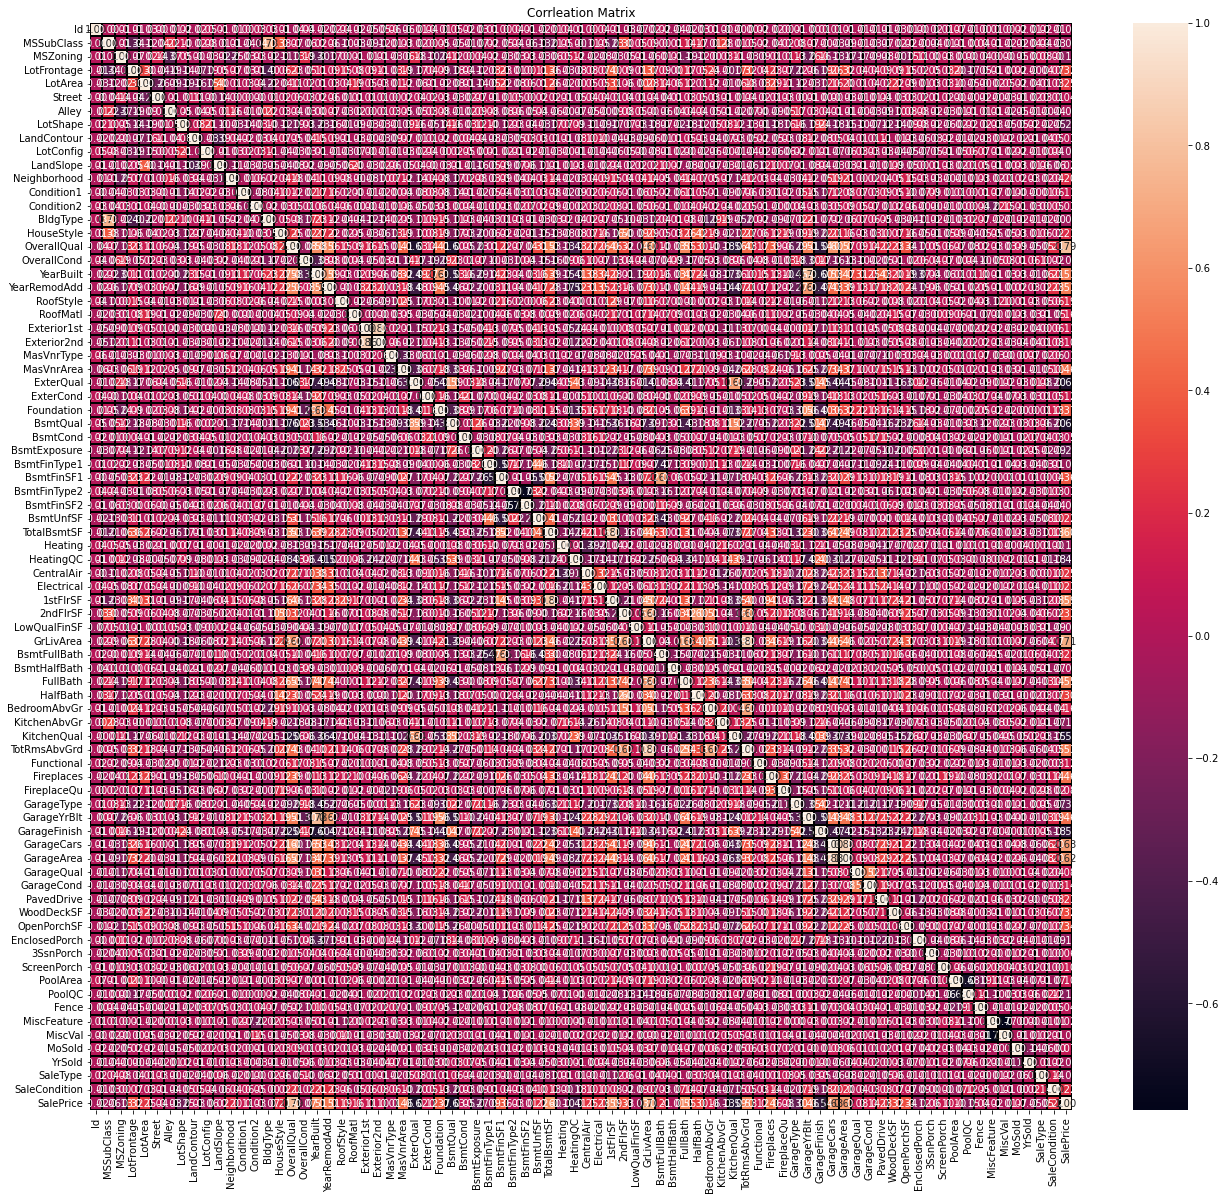

In [74]:
# Heatmap Display distribution of data across all level of category

plt.figure(figsize=(22,20))
plt.title("Corrleation Matrix")
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

**Observations:** *We are unable to identify the correlation in above heatmap due to huge number of columns.*

In [75]:
corr_matrix=df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea    

*Now we can clearly identify the correlation of independent variables with the target variables "SalePrice".There are around 25 variables who has less than 0.01 correlation value(very week relationship.)*

*Checking the columns which are postively and negative correlated with the target columns:*

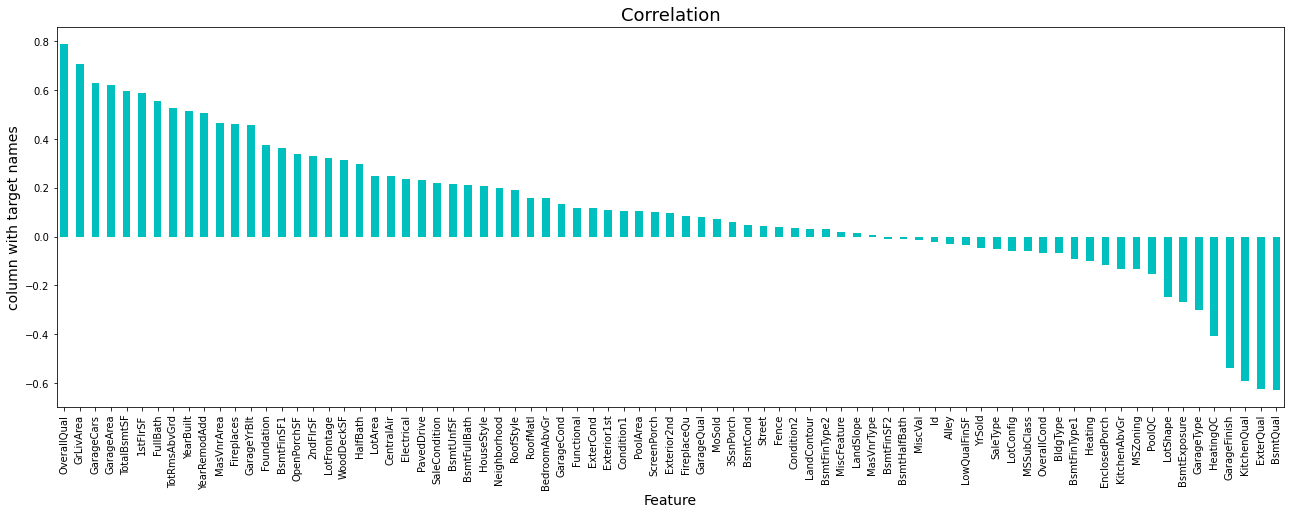

In [76]:
plt.figure(figsize=(22,7))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

*Lets check the data distribution among all the columns.*

In [77]:
collist=df.columns.values
ncol=12
nrow=10

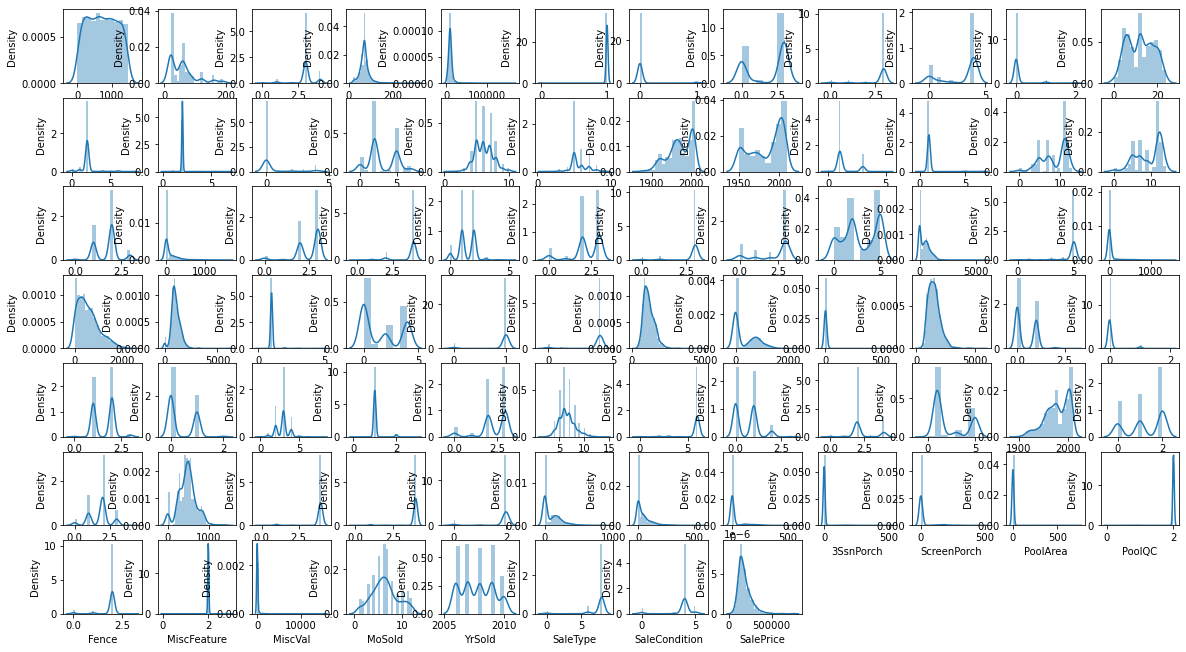

In [78]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,16))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

*We can see skewness in data for the multiple columns, will handle the skewness in further steps.*

**Outliers Check:**

*There are 80 columns in dataset so its not possible to plot each and every columns separately or plot all together. so we will print in 4 steps*

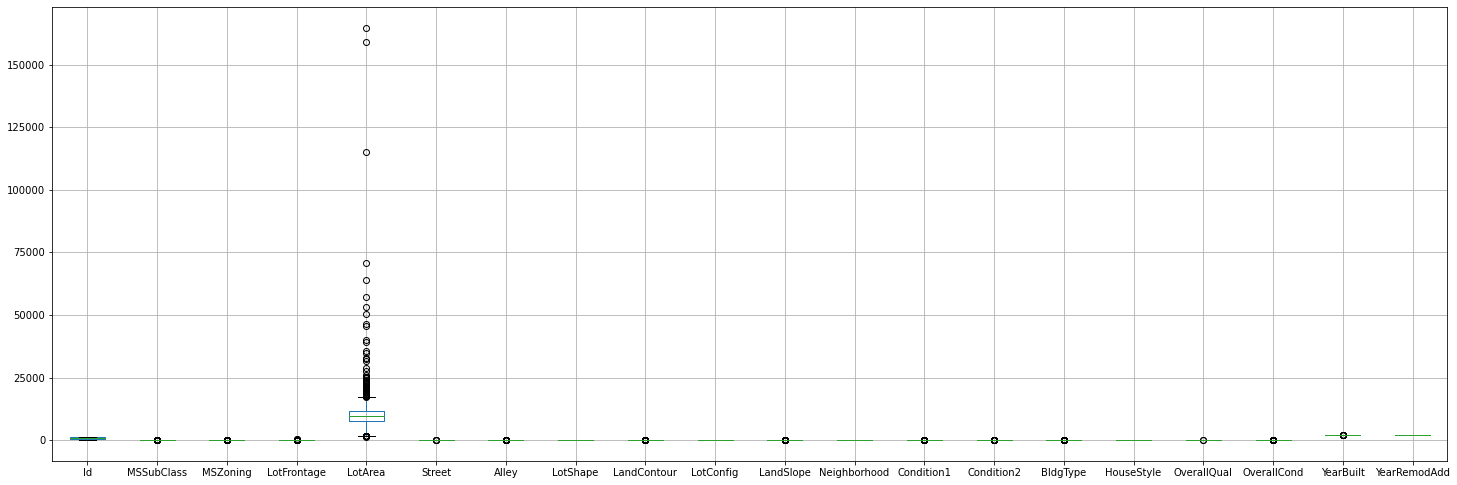

In [79]:
#Plotting Boxplots for first 20 columns
df.iloc[:,0:20].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

*There are outliers in lot area column.*

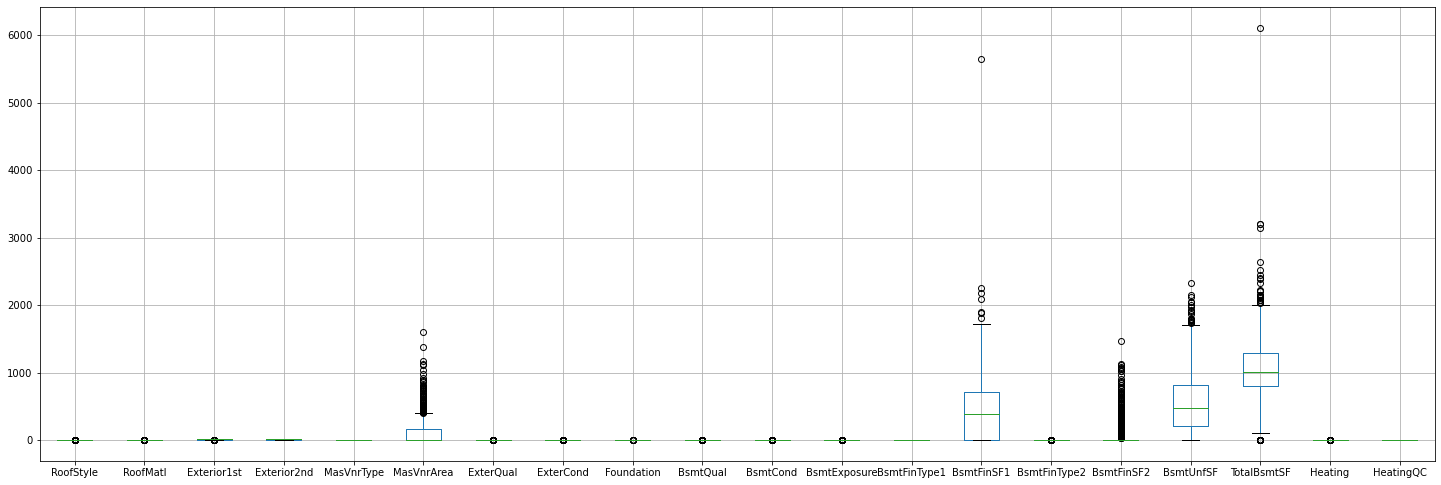

In [80]:
#Plotting boxplot for next 20 columns
df.iloc[:,20:40].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

*We can see outliers in MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF.*

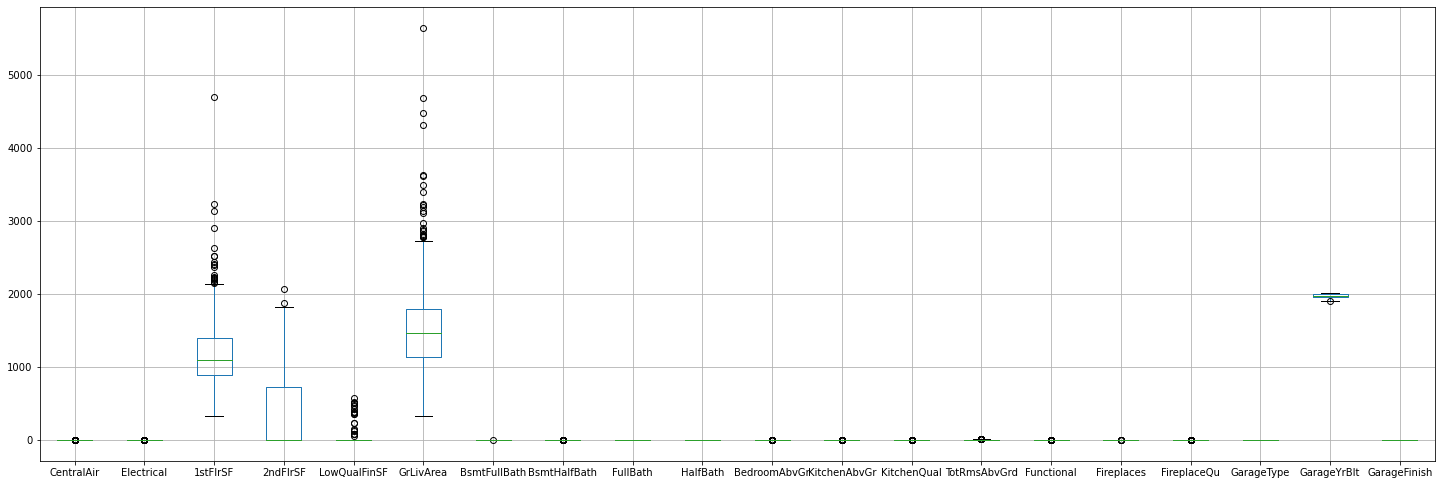

In [81]:
#Plotting boxplot for next 20 columns
df.iloc[:,40:60].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

*We can see outliers in 1stFlrSF, LowQualFinSF,GrLivArea,GarageYrBuilt.*

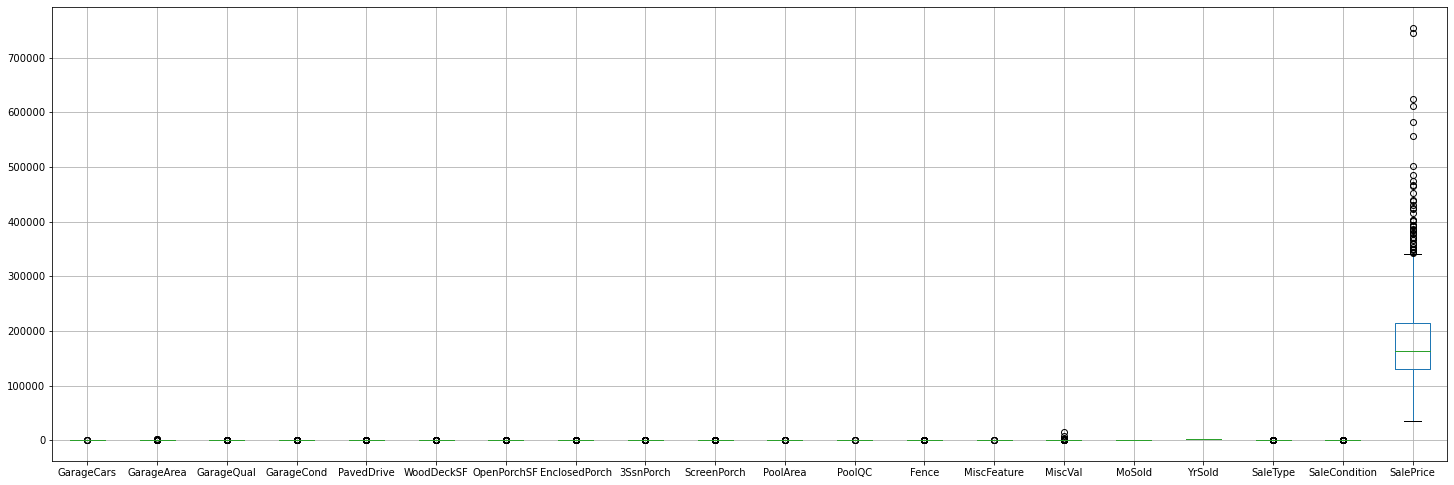

In [82]:
#Plotting boxplot for rest all the columns
df.iloc[:,60:80].boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

*We can see one or two values outer of whiskers but those are near to whiskers so these are not outliers.The outliers are not consider for target variables.*

In [83]:
#Checking skewness
df.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
Alley             5.436187
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
T

*We can see skewness in the dataset,We will handle the skewness using power transform function.*

In [84]:
# Splitting the indepedent and target variable in x and y
x= df.drop('SalePrice',axis=1)
y= df['SalePrice']

In [85]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [86]:
df_new.skew()

Id               -0.268486
MSSubClass        0.064007
MSZoning          0.233113
LotFrontage       0.161368
LotArea           0.032509
Street          -17.021969
Alley             5.436187
LotShape         -0.594207
LandContour      -2.592303
LotConfig        -1.030401
LandSlope         3.954345
Neighborhood     -0.146541
Condition1        0.225468
Condition2        0.537277
BldgType          1.857194
HouseStyle       -0.080331
OverallQual       0.021658
OverallCond       0.048063
YearBuilt        -0.126641
YearRemodAdd     -0.225131
RoofStyle        -0.292233
RoofMatl         -6.314987
Exterior1st      -0.338023
Exterior2nd      -0.352793
MasVnrType       -0.016203
MasVnrArea        0.416370
ExterQual        -0.605112
ExterCond        -2.270791
Foundation        0.004296
BsmtQual         -0.413999
BsmtCond         -3.025865
BsmtExposure     -0.914214
BsmtFinType1     -0.206639
BsmtFinSF1       -0.404528
BsmtFinType2     -2.420885
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
T

*Skweness has been removed, now we can proceed with further steps.*

In [87]:
x=df_new
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.544968,1.370435,-0.162456,0.093658,-1.213954,0.058621,-0.178331,-1.366794,0.341434,0.617281,-0.238775,0.198357,0.053284,0.0038,2.310950,-0.463401,-0.052799,-0.496528,0.026859,-0.613054,-0.388056,-0.088315,-0.326182,-0.209982,0.383932,-0.822734,0.778521,0.377961,-0.558722,-0.606202,0.300945,0.673258,-1.619575,-0.112649,0.360988,-0.363019,0.903777,0.099335,-0.092972,1.231264,0.267506,0.302595,-0.458345,-0.871745,-0.14173,-1.236502,-0.837006,-0.238775,0.80229,-0.782707,-1.083459,-0.169259,0.944965,-0.984125,0.276573,0.777879,1.673239,-0.673804,-0.219139,-0.376496,0.259753,-0.113082,0.220168,0.195505,0.300947,-0.959773,1.409990,-0.411301,-0.138554,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-1.719437,-0.604806,0.409069,0.029735
1,0.461941,-1.167999,-0.162456,1.117135,1.100521,0.058621,-0.178331,-1.366794,0.341434,0.617281,4.188040,0.037086,0.053284,0.0038,-0.436548,-0.463401,1.345826,0.407009,-0.185817,-0.854247,-5.058580,5.396201,1.159356,1.119374,0.383932,-0.822734,-1.124906,-2.646123,0.852373,0.982931,-3.324610,-1.419429,-1.619575,0.394677,-2.532187,2.756067,1.027313,2.374300,-0.092972,-0.968376,0.267506,0.302595,2.122554,-0.871745,-0.14173,1.295050,1.176812,-0.238775,0.80229,-0.782707,1.356214,-0.169259,-0.687929,0.943901,0.276573,0.777879,1.673239,-0.673804,-0.505658,0.972281,0.259753,0.678810,0.220168,0.195505,0.300947,0.781991,1.414498,-0.411301,-0.138554,3.360787,-0.077648,0.058621,0.177447,0.010754,-0.193133,1.320612,-0.604806,0.409069,0.029735
2,0.254221,0.490047,-0.162456,0.998803,0.158048,0.058621,-0.178331,-1.366794,0.341434,-1.482445,-0.238775,0.512775,0.053284,0.0038,-0.436548,1.021519,0.656375,-0.496528,0.836680,0.495717,-0.388056,-0.088315,-0.646692,-0.781046,0.383932,-0.822734,-1.124906,0.377961,0.852373,-0.606202,0.300945,-1.754271,-0.368766,0.925416,0.360988,-0.363019,-0.504500,0.185571,-0.092972,-0.968376,0.267506,0.302595,0.058641,1.176207,-0.14173,1.003880,1.176812,-0.238775,0.80229,1.268421,0.151784,-0.169259,0.944965,0.943901,0.276573,0.777879,1.673239,-0.673804,0.769650,0.972281,0.259753,-0.045422,0.220168,0.195505,0.300947,1.043999,1.198911,-0.411301,-0.138554,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-0.076750,-0.604806,0.409069,0.029735
3,-1.610857,-1.167999,-0.162456,1.495566,0.496002,0.058621,-0.178331,-1.366794,0.341434,0.617281,-0.238775,0.356843,0.053284,0.0038,-0.436548,-0.463401,-0.052799,0.407009,0.063582,-0.569998,1.737139,-0.088315,-0.326182,-0.209982,-1.237353,1.382984,0.778521,0.377961,-0.558722,-0.606202,0.300945,0.673258,-0.954307,0.797133,0.360988,-0.363019,1.160517,1.674462,-0.092972,-0.968376,0.267506,0.302595,1.574554,-0.871745,-0.14173,0.739356,-0.837006,-0.238775,0.80229,-0.782707,0.151784,-0.169259,0.944965,0.375729,0.276573,0.777879,1.673239,-0.673804,-0.219139,-0.376496,0.259753,0.356726,0.220168,0.195505,0.300947,-0.959773,1.169545,-0.411301,-0.138554,-0.297551,-0.077648,0.058621,0.177447,0.010754,-0.193133,-2.209015,1.649761,-2.769993,0.029735
4,-0.635571,-1.167999,-0.162456,0.093658,1.196626,0.058621,-0.178331,-1.366794,0.341434,-1.025661,-0.238775,0.356843,0.053284,0.0038,-0.436548,-0.463401,-0.052799,1.234321,0.063582,0.69

# Importing Libraries for Metrics and Model buiding.

In [88]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [89]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

# Regression Method

## Linear Regression Model

In [90]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [91]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.8611922773551914
At random state 0,the testing accuracy is:0.628106271126705


At random state 1,the training accuracy is:0.8428399595414504
At random state 1,the testing accuracy is:0.8000667528031478


At random state 2,the training accuracy is:0.8599277942549721
At random state 2,the testing accuracy is:0.7392257984686481


At random state 3,the training accuracy is:0.8345878327022818
At random state 3,the testing accuracy is:0.8138999232686429


At random state 4,the training accuracy is:0.8402033609825827
At random state 4,the testing accuracy is:0.7653085502421472


At random state 5,the training accuracy is:0.879786383162655
At random state 5,the testing accuracy is:0.6346109102328922


At random state 6,the training accuracy is:0.8383652092013691
At random state 6,the testing accuracy is:0.8063720500201562


At random state 7,the training accuracy is:0.847729784642191
At random state 7,the testing accuracy is:0.7626951984179203


At 

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=99)
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
print(lr.intercept_)

181331.0120537971


In [94]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff_df

,Co-efficient
Id,263.780534
MSSubClass,-3528.086564
MSZoning,-417.632112
LotFrontage,-242.161025
LotArea,4207.689528
Street,1046.669128
Alley,-349.522302
LotShape,955.881927
LandContour,2332.877267
LotConfig,-955.699800


In [95]:
pred=lr.predict(x_test)

In [96]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
1166,40000,57240.896385
610,285000,292995.009450
304,190000,184681.765573
266,175500,177710.196520
434,159950,120132.127974


In [97]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 23292.08090260509
Mean squared error: 1092376863.4258146
Root mean squared error: 33051.124994859325


In [98]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

82.14120374676183


In [99]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

83.17074217579034


*The Cross validation Score for Linear Regression Model*

In [100]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for tesing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.684148563647263 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.6795346280076218 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.7367114100476274 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.7513770475470654 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.7201744196681683 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.7336667265829203 and accuracy score for training is 0.8317074217579034 and accuracy score for tesing is 0.8214120374676184


At cross fold(j) the cv score is 0.757807

*Since the number dont have such impact on the accuracy and cv_score.*

*Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.*

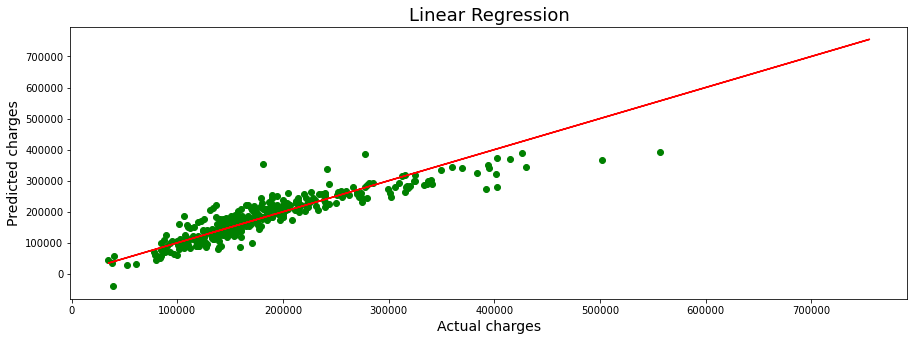

In [103]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Random Forest Regressor Model

In [104]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()

In [105]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    rdr.fit(x_train,y_train)
    pred_train=rdr.predict(x_train)
    pred_test=rdr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9819152511710217
At random state 0,the testing accuracy is:0.7044701326283314


At random state 1,the training accuracy is:0.9770290481613169
At random state 1,the testing accuracy is:0.8675669592973153


At random state 2,the training accuracy is:0.9768892814761717
At random state 2,the testing accuracy is:0.8470919858160626


At random state 3,the training accuracy is:0.9774493990518224
At random state 3,the testing accuracy is:0.8532234070804146


At random state 4,the training accuracy is:0.9711134906376495
At random state 4,the testing accuracy is:0.8317736299156124


At random state 5,the training accuracy is:0.981552803876288
At random state 5,the testing accuracy is:0.686299519100368


At random state 6,the training accuracy is:0.9726036616829522
At random state 6,the testing accuracy is:0.8931086684378358


At random state 7,the training accuracy is:0.9758891534563775
At random state 7,the testing accuracy is:0.8646981882848784


At

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=99)
rdr.fit(x_train,y_train)

RandomForestRegressor()

In [107]:
pred=rdr.predict(x_test)

In [108]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
1166,40000,97981.93
610,285000,302483.35
304,190000,218618.16
266,175500,181877.82
434,159950,151292.00


In [109]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 17390.8445014245
Mean squared error: 633144710.318216
Root mean squared error: 25162.366945862148


In [110]:
predict_test=rdr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

89.6489913335148


In [111]:
predict_train=rdr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

97.61720195103662


*The Cross validation score for Random Forest Regressor Model*

In [112]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.8182594857841985 and accuracy score for training is 0.9761720195103661 and accuracy score  for testing is 0.896489913335148


At cross fold(j) the cv score is 0.8554408775173464 and accuracy score for training is 0.9761720195103661 and accuracy score  for testing is 0.896489913335148


At cross fold(j) the cv score is 0.8375129434485502 and accuracy score for training is 0.9761720195103661 and accuracy score  for testing is 0.896489913335148


At cross fold(j) the cv score is 0.8399006994495407 and accuracy score for training is 0.9761720195103661 and accuracy score  for testing is 0.896489913335148


At cross fold(j) the cv score is 0.8499567561902451 and accuracy score for training is 0.9761720195103661 and accuracy score  for testing is 0.896489913335148


At cross fold(j) the cv score is 0.8332077070832812 and accuracy score for training is 0.9761720195103661 and accuracy score  for testing is 0.896489913335148


At cross fold(j) the cv score is 0

*Since the number don't have such impact on the accuracy and cv_score.*

*Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.*

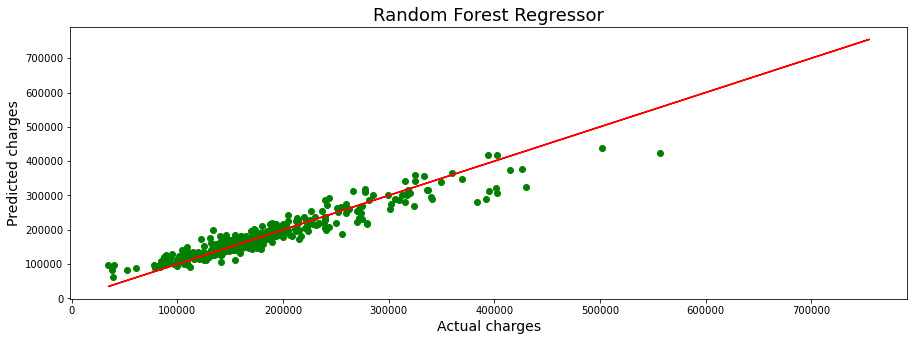

In [114]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

# Decision Tree Regressor Model

In [115]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [116]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.22311004493315467


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.7582000016839167


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.6945716573812929


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.7406424698241563


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.607139692920484


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.5713609774280972


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.7928659136252596


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.7115524648521545


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.7994279955065593


At random 

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [118]:
pred=dtr.predict(x_test)

In [119]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
601,289000,297000.0
137,106500,116000.0
33,128500,122500.0
315,155000,127000.0
199,237500,277000.0


In [120]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 25074.82336182336
Mean squared error: 1166319585.3874643
Root mean squared error: 34151.421425578534


In [121]:
predict_test=dtr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

79.37488501325821


In [122]:
predict_train=dtr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

100.0


*The Cross validation score for Decision Tree Regressor model*

In [123]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.5140373277716925 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7937488501325821


At cross fold(j) the cv score is 0.6887497321833131 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7937488501325821


At cross fold(j) the cv score is 0.7190241835028855 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7937488501325821


At cross fold(j) the cv score is 0.6721566186636097 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7937488501325821


At cross fold(j) the cv score is 0.7327270249204655 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7937488501325821


At cross fold(j) the cv score is 0.679024522192076 and accuracy score for training is 1.0 and accuracy score  for testing is 0.7937488501325821


At cross fold(j) the cv score is 0.7081012557797335 and accuracy score for training is 1.0 and accuracy score  for test

*Since the number dont have such impact on the accuracy and cv_score.*

*Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.*

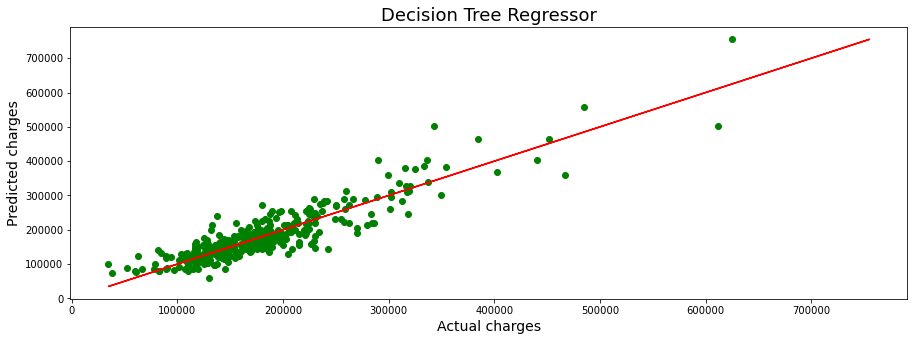

In [124]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

# XGBoost Regressor

In [125]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [126]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9999708192693281
At random state 0,the testing accuracy is:0.6903268904314472


At random state 1,the training accuracy is:0.9999805300614729
At random state 1,the testing accuracy is:0.8369764399296244


At random state 2,the training accuracy is:0.9999351963104378
At random state 2,the testing accuracy is:0.8356703477064888


At random state 3,the training accuracy is:0.9999751023055329
At random state 3,the testing accuracy is:0.8772526948613596


At random state 4,the training accuracy is:0.9999632231954367
At random state 4,the testing accuracy is:0.8743388593006163


At random state 5,the training accuracy is:0.9999739152228964
At random state 5,the testing accuracy is:0.6472814122742838


At random state 6,the training accuracy is:0.9999637649251519
At random state 6,the testing accuracy is:0.8728191488902264


At random state 7,the training accuracy is:0.9999246724973794
At random state 7,the testing accuracy is:0.8521382811976438




In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=91)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [128]:
pred=xgb.predict(x_test)

In [129]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
541,139000,129710.453125
298,117000,132248.406250
715,107000,147713.718750
144,155000,150678.093750
942,173000,153960.187500


In [130]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 17275.816228187323
Mean squared error: 683514616.461609
Root mean squared error: 26144.11246268668


In [131]:
predict_test=xgb.predict(x_test)
print(r2_score(y_test,predict_test)*100)

89.23427072753314


In [132]:
predict_train=xgb.predict(x_train)
print(r2_score(y_train,predict_train)*100)

99.9952165169556


*The Cross validation score for XGBoost Regressor model*

In [133]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(xgb,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.8310814932956666 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8498999211672807 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8216741137987187 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8275563386837126 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8209678497894254 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0.8234253191064335 and accuracy score for training is 0.999952165169556 and accuracy score  for testing is 0.8923427072753314


At cross fold(j) the cv score is 0

*Since the number dont have such impact on the accuracy and cv_score.*

*Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.*

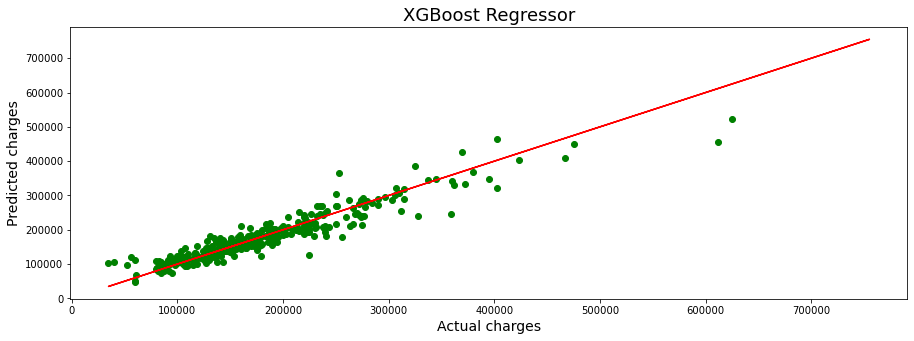

In [135]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('XGBoost Regressor',fontsize=18)
plt.show()

# k-nearest neighbors (KNN)

In [136]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [137]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.8534033664108981
At random state 0,the testing accuracy is:0.6612470529095025


At random state 1,the training accuracy is:0.8184293174912819
At random state 1,the testing accuracy is:0.7571249028987074


At random state 2,the training accuracy is:0.8470549594528199
At random state 2,the testing accuracy is:0.687634751273347


At random state 3,the training accuracy is:0.816259865675923
At random state 3,the testing accuracy is:0.7630284319730999


At random state 4,the training accuracy is:0.8158759948109283
At random state 4,the testing accuracy is:0.7474240670209962


At random state 5,the training accuracy is:0.8438792992148454
At random state 5,the testing accuracy is:0.6738126321908879


At random state 6,the training accuracy is:0.8154447038170716
At random state 6,the testing accuracy is:0.7708903327350713


At random state 7,the training accuracy is:0.8396203797547432
At random state 7,the testing accuracy is:0.7034601748537008


At

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=74)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [139]:
pred=knn.predict(x_test)

In [140]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
823,120500,120380.0
902,97000,99700.0
903,145000,131551.6
795,107000,127900.0
535,157900,141390.0


In [141]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 21576.032478632478
Mean squared error: 853157344.5457551
Root mean squared error: 29208.857296131173


In [142]:
predict_test=knn.predict(x_test)
print(r2_score(y_test,predict_test)*100)

81.81449423787076


In [143]:
predict_train=knn.predict(x_train)
print(r2_score(y_train,predict_train)*100)

81.60799145180421


*The Cross validation score for k-nearest neighbors (KNN) model*


In [144]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.7348250914784015 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.7346952477046518 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.7426066221710337 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.7379446075355829 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.745652851629671 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score is 0.7361629351248679 and accuracy score for training is 0.8160799145180421 and accuracy score  for testing is 0.8181449423787076


At cross fold(j) the cv score

*Since the number dont have such impact on the accuracy and cv_score.*

*Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.*

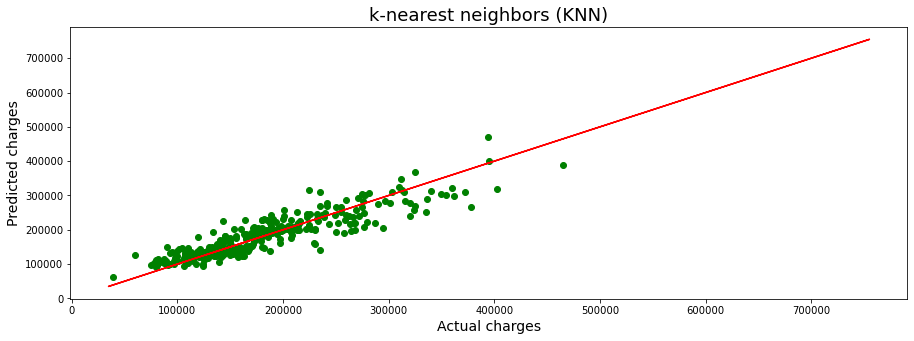

In [146]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=predict_test, color='g')
plt.plot(y,y, color='r')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('k-nearest neighbors (KNN)',fontsize=18)
plt.show()

# Hyper Parameter Tuning

In [147]:
from sklearn.model_selection import GridSearchCV

# Ensemble Technique

In [148]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'random_state': 8}


In [149]:
rdr=RandomForestRegressor(criterion='mae',max_features='auto',random_state=8)
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 86.79417521156296
Cross Val Score: 84.6832604168003


*We are getting model accuracy and cross validation has 86% & 84% respectively.*

In [150]:
from sklearn.ensemble import GradientBoostingRegressor
parameters = {"max_depth": [4, 5, 6],"learning_rate": [0.005, 0.009, 0.01],
                         "n_estimators": [700, 1000, 2500]}
xgb=XGBRegressor()
clf=GridSearchCV(xgb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.009, 'max_depth': 4, 'n_estimators': 2500}


In [151]:
xgb=GradientBoostingRegressor(max_depth=4,learning_rate=0.009,n_estimators=2500)
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_decision=xgb.predict(x_test)
xgbs=r2_score(y_test,pred_decision)
print('R2 Score:',xgbs*100)
xgbscore=cross_val_score(xgb,x,y,cv=5)
xgbc=xgbscore.mean()
print('Cross Val Score:',xgbc*100)

R2 Score: 89.10321622416059
Cross Val Score: 86.62504350599514


*We are getting model accuracy and cross validation has 89% & 86% respectively.which shows our model is performing well*

# Analysis and Comparision

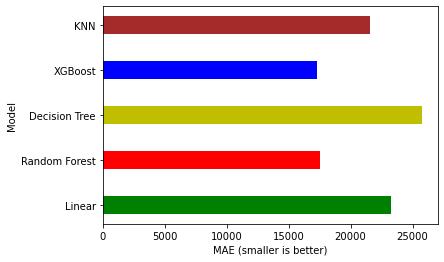

In [152]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost', 'KNN']
y = [23292.08, 17556.97 , 25741.56, 17275.81, 21576.03]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MAE (smaller is better)", ylabel="Model");

* By looking at the table and the graph, we can see that XGBoost model has the smallest MAE, 17,275.81 followed by Random Forest model with a little larger error of 17556.97. After that, K-Nearest Neighbors come with error of 21,576.03.At last, the linear and Decision Tree model comes with an similar errors: 23,292.08 and 25,741.56 respectively.

* So, In our experiment, the best model is XGBoost model and the worst model is Decision Tree model. We can see that the difference in MAE between the best model and the worst model is significant; the best model has almost 30 % of the error of the worst model.

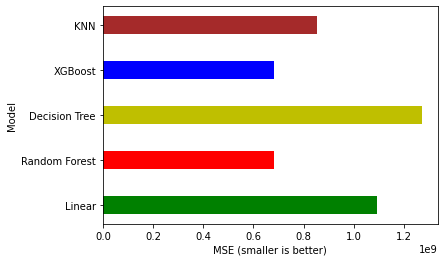

In [153]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost', 'KNN']
y = [1092376863.42, 681447503.74, 1271277570.76, 683514616.46, 853157344.54]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MSE (smaller is better)", ylabel="Model");

* By looking at the table and the graph, we can see that Random Forest model has the smallest RMSE, 26,104.54 followed by XGBoost with a little larger error of 26,144.11. After that, K-Nearest Neighbors come with error of 29,208.85.At last, the linear and Decision tree model comes with an similar errors: 33,051.12 and 35,654.97 respectively.

* So, in our experiment, the best model is Random Forest and the worst model is Decision Tree model. We can see that the difference in MSE between the best model and the worst model is significant; the best model has almost 25 % of the error of the worst model.

* Finally,we came to know that our best model is both XGBoost and Random Forest,then the worst model is Decision Tree.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

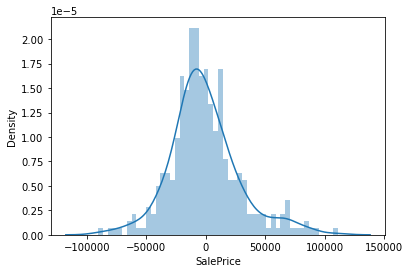

In [154]:
#Distploy Display distribution of data across all level of category.
sns.distplot((y_test-predict_test),bins=50)

*Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.*

# Feature Importances

Now, let's see the most important features as for Random Forest model:

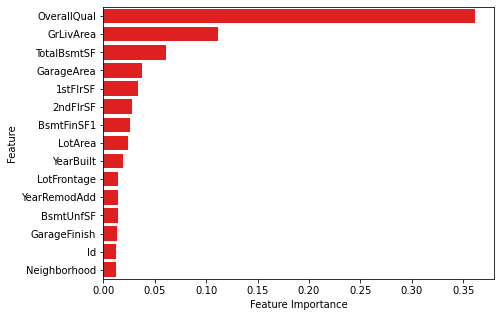

In [155]:
rdr_feature_importances = rdr.feature_importances_
rdr_feature_importances = pd.Series(rdr_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rdr_feature_importances, y=rdr_feature_importances.index, color="r");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

Let's discover the most important features as determined by XGBoost Regression:

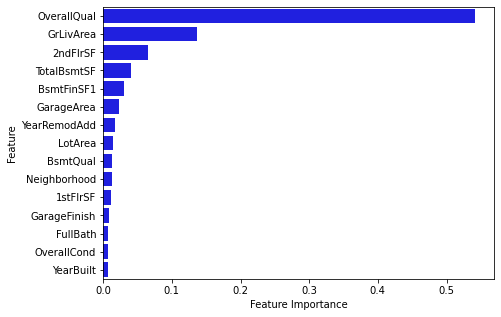

In [156]:
xgb_feature_importances = xgb.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=xgb_feature_importances, y=xgb_feature_importances.index, color="b");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

## Common Important Features


*Now, let us see which features are among the most important features for both Decision Tree and Random Forest models, and let's find out the difference in their importance regarding the two models:*

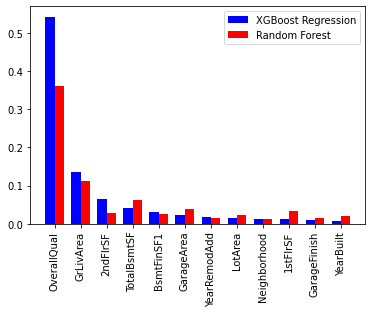

In [157]:
common_imp_feat = [x for x in xgb_feature_importances.index 
                   if x in rdr_feature_importances.index]
commImpFeat_xgb = [xgb_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_rdr = [rdr_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb, width,
       color='b', label='XGBoost Regression');
ax.bar(ind + width/2, commImpFeat_rdr, width, 
       color='r', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);


*Compare with Actual Final Vs Sample Prediction:*

,Y Test,Prediction
823,120500,120380.0
902,97000,99700.0
903,145000,131551.6
795,107000,127900.0
535,157900,141390.0


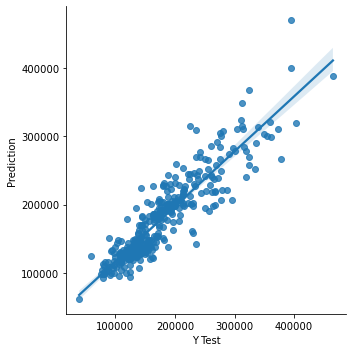

In [158]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Model Saving

In [159]:
import pickle
filename='Housing Price Prediction.pkl'
pickle.dump(xgb, open(filename, 'wb'))

# Conclusion

In [160]:
loaded_model = pickle.load(open('Housing Price Prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

89.10321622416059


In [161]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350
Predicted,113390.497584,108430.146888,169449.620245,91794.050179,154184.809773,137482.429634,149271.096313,315686.232494,170711.732184,170787.088483,270613.562234,167756.445331,161732.619639,284572.453264,115146.968375,116634.869603,133180.806912,127816.452941,192686.619329,137386.287267,125825.60554,227451.032989,218612.303567,125784.939033,157380.008347,127237.863027,149443.34648,131117.114395,140108.235979,140766.95697,241328.968206,213699.45231,117736.923768,235017.891399,127584.372323,128687.562983,178777.461245,203756.839549,143000.410505,159699.353459,201416.570085,340479.400322,198091.651018,108289.284215,133886.918028,243107.720911,113728.688195,130021.071679,127819.974293,156038.255056,218883.137972,260463.233567,145279.74166,199173.857607,296273.021485,257132.981888,126317.186214,237067.661699,131021.139589,211186.09785,172960.694636,99491.535609,145930.630679,343368.142032,85771.155975,138095.225636,237306.495399,337377.377865,150018.287802,96915.688312,299760.533482,132241.174441,273966.313775,87034.714757,302784.340001,163602.354851,146299.741234,251352.675029,243301.362015,216202.346812,147142.480832,168810.502371,183639.799674,302753.616404,176960.32969,211965.618213,107785.132497,186749.662562,139160.757463,150667.789922,213762.821564,204844.272374,177363.335477,110896.119839,115224.971799,286620.053666,106363.44031,110223.268035,141763.829232,81519.35177,141015.130845,406941.279226,96094.797405,106484.058375,236374.395574,225018.508283,109961.305825,175134.167518,123099.068648,245807.604644,159986.789894,163320.723043,117667.555357,85726.818378,282790.101542,192393.587823,173297.026189,173535.065336,173688.624108,125462.283368,130839.84048,131166.291589,330456.594951,150249.32048,151358.707723,244582.896577,235411.260174,314122.670107,171820.583637,154314.09808,103799.266822,149088.725672,322230.252265,168729.572378,139850.679772,319180.195267,348693.505085,264892.867604,223617.828355,172897.622595,165562.728131,85886.128402,179494.392421,155867.655261,237418.103846,119980.262908,131834.139027,138738.622022,193133.793435,249469.546068,268188.195813,199600.315798,201268.902941,118097.784247,145350.945414,196590.145885,131833.650114,207726.912898,157453.627452,231696.040946,159972.553457,132469.530321,213552.316985,135707.764949,180991.514539,280354.242545,219121.808797,188137.598471,245778.347862,153828.632883,367601.673822,154405.467247,166022.269727,163381.333455,318774.495397,163811.962517,142153.045023,325128.01512,136384.274082,108863.912503,150425.549979,110172.033905,104421.442816,204017.459112,80872.379011,159530.938496,83349.798946,113460.267945,117870.009106,213988.049572,216642.736734,272345.973352,130146.428991,249147.786392,354